In [1]:
# Memuat pustaka
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report
import requests

In [4]:
# URL ke file CSV di GitHub
url = 'https://raw.githubusercontent.com/baniadamtampubolon/dataset/main/cleaned_mental_data.csv'


# Cara 2: Mengunduh data dengan requests dan memperbaiki secara manual
response = requests.get(url)
csv_data = response.content.decode('utf-8')

# Menyimpan ke file sementara
with open('cleaned_mental_data.csv', 'w') as f:
    f.write(csv_data)

# Membaca file CSV dengan pandas
mental_data = pd.read_csv('cleaned_mental_data.csv', on_bad_lines='skip')
data = mental_data
mental_data.head()

,age,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,trouble.sleeping,trouble.with.work,hopelessness,anger,...,nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder
0,23,1,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,MDD
1,14,1,0,1,0,0,1,0,0,1,...,1,1,0,0,0,0,1,0,0,ASD
2,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Loneliness
3,29,1,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,1,bipolar
4,32,1,1,1,1,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,anxiety


In [5]:
# Memisahkan fitur dan target
X = data.drop(columns=['Disorder'])
y = data['Disorder']

In [6]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Mengkodekan label
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [8]:
# Membuat model Sequential
model = Sequential()

In [9]:
model = Sequential()
# Menambahkan layer
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

In [10]:
# Kompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Melatih model
history = model.fit(X_train, y_train_encoded, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

In [12]:
# Mengevaluasi model pada data uji
loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.9140625


In [13]:
# Membuat prediksi
y_pred_encoded = model.predict(X_test).argmax(axis=1)

4/4 [==============================] - 0s 2ms/step


In [14]:
# Menyimpan model ke file
model.save('mental_health_model.h5')


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
# Memuat model yang telah disimpan
from tensorflow.keras.models import load_model

loaded_model = load_model('mental_health_model.h5')


In [16]:
# Contoh input pengguna
import random
import numpy as np

# input_data = [29,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0]  # Ganti dengan input Anda

# Menghasilkan nilai acak antara 0 atau 1 sebanyak 27 kali

random_values = [random.randint(0, 1) for _ in range(27)] # random value untuk gejala
input_data = [23] + random_values # input untuk umur
print(input_data)
print("\n")

# Konversi input_data menjadi array numpy 2D dan ubah bentuknya agar sesuai dengan kebutuhan model
input_data = np.array([input_data])  # Mengonversi menjadi array numpy 2D dengan satu baris

# Lakukan prediksi
prediction = model.predict(input_data)

# Membuat prediksi
prediction = model.predict(input_data)
print("\n")
print(f"Predicted Disorder: {prediction}")

[23, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1]


1/1 [==============================] - 0s 17ms/step


Predicted Disorder: [[0.03749927 0.21637917 0.01861967 0.15579939 0.03818358 0.17123877
  0.11246108 0.06444627 0.06474145 0.05524126 0.05243792 0.0129522 ]]


Prediction: ASD


ADHD: 3.75%
ASD: 21.64%
Loneliness: 1.86%
MDD: 15.58%
OCD: 3.82%
PDD: 17.12%
PTSD: 11.25%
Anxiety: 6.44%
Bipolar: 6.47%
Eating Disorder: 5.52%
Psychotic Depression: 5.24%
Sleeping Disorder: 1.30%




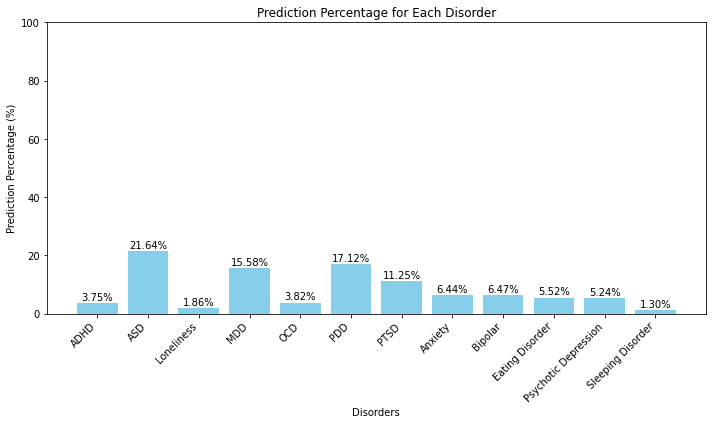

In [17]:
# Labels
labels = {
    0: "ADHD",
    1: "ASD",
    2: "Loneliness",
    3: "MDD",
    4: "OCD",
    5: "PDD",
    6: "PTSD",
    7: "Anxiety",
    8: "Bipolar",
    9: "Eating Disorder",
    10: "Psychotic Depression",
    11: "Sleeping Disorder",
    12: "Inconclusive"
}

# Mengambil label dari prediksi
predicted_label = labels[np.argmax(prediction)]

print(f"Prediction: {predicted_label}")
print("\n")

# Mendapatkan jumlah prediksi untuk setiap penyakit
predicted_percentages = (prediction[0] / prediction[0].sum()) * 100

# Menampilkan persentase prediksi untuk setiap penyakit
for i, percentage in enumerate(predicted_percentages):
    disorder_name = labels[i]
    print(f"{disorder_name}: {percentage:.2f}%")

print("\n")
# PLOT CHART

import matplotlib.pyplot as plt

# Membuat grafik batang menggunakan Matplotlib
disorder_names = [labels[i] for i in range(len(predicted_percentages))]
percentages = [predicted_percentages[i] for i in range(len(predicted_percentages))]

plt.figure(figsize=(10, 6))
plt.bar(disorder_names, percentages, color='skyblue')
plt.xlabel('Disorders')
plt.ylabel('Prediction Percentage (%)')
plt.title('Prediction Percentage for Each Disorder')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)

# Menambahkan persentase di atas setiap batang
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center')

plt.tight_layout()
plt.show()
